In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Handy utility functions

In [3]:
def project_into_space(X_embedded, labels, class_names=None):
    """Function draws data embedded into 2-dimensional vector space"""
    
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    for i in range(len(set(labels))):
        digit_indeces = (labels == i)
        dim1 = X_embedded[digit_indeces, 0]
        dim2 = X_embedded[digit_indeces, 1]
        if class_names != None:
            plot.scatter(dim1, dim2, label = class_names[i])
        else:
            plot.scatter(dim1, dim2, label = i)
    
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.show()
    
def save_to_txt(data, labels, file_path):
    """Function saves data to file with extension .txt"""
    
    df = pd.DataFrame(data)
    df['labels'] = labels
    np.savetxt(file_path, df, fmt='%d')

# *args are arguments of function named func
def measure_time(func, *args):
    """Function measures program's time execution"""
    
    start_time = time.time()
    prog = func(*args)
    end_time = time.time()
    
    return end_time - start_time

### Constants

In [4]:
TIME_DICT = {
    'umap_time' : None,
    'humap_time' : None,
    'trimap_time': None,
    'pacmap_time' : None,
    'isomap_time' : None,
    # 'ivhd_time' : None, it will be saved on disc using bash command
}

In [5]:
TRUSTWORTHINESS_DICT = {
    'umap' : None,
    'humap' : None,
    'trimap': None,
    'pacmap' : None,
    'isomap' : None,
    'ivhd' : None
}

### Data preparation

In [6]:
df = pd.read_csv("smallnorb.csv", header = None)

In [8]:
df.head(5)

0      1      2      3      4      5      6      7      8      9     ...  \
0  174.0  174.0  174.0  174.0  174.0  174.0  174.0  174.0  174.0  174.0  ...   
1  174.0  174.0  174.0  174.0  174.0  174.0  174.0  174.0  174.0  174.0  ...   
2  182.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0  ...   
3  230.0  230.0  230.0  230.0  230.0  230.0  230.0  230.0  230.0  230.0  ...   
4  228.0  228.0  228.0  228.0  228.0  228.0  228.0  228.0  228.0  228.0  ...   

    9207   9208   9209   9210   9211   9212   9213   9214   9215  9216  
0  173.0  172.0  172.0  172.0  173.0  173.0  173.0  172.0  172.0     0  
1  173.0  172.0  172.0  172.0  173.0  173.0  173.0  172.0  172.0     0  
2  181.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0     1  
3  230.0  230.0  230.0  230.0  230.0  230.0  230.0  230.0  230.0     2  
4  226.0  227.0  227.0  227.0  227.0  227.0  227.0  228.0  228.0     3  

[5 rows x 9217 columns]

In [9]:
SAMPLE_SIZE_SMALL = 30000
SAMPLE_SIZE_TINY = 10000

full = np.array(df, dtype='float32')

X_full = full[:, :-1]
y_full = full[:,-1].astype('int')

X_small = X_full[:SAMPLE_SIZE_SMALL]
y_small = y_full[:SAMPLE_SIZE_SMALL]

X_tiny = X_full[:SAMPLE_SIZE_TINY]
y_tiny = y_full[:SAMPLE_SIZE_TINY]

df_full = pd.DataFrame(X_full)
# df_full.to_csv('./smallnorb_full_no_labels.csv', header = False, index = False)

df_labels = pd.DataFrame(y_full)
# df_labels.to_csv('./smallnorb_full_labels.csv', header = False, index = False)

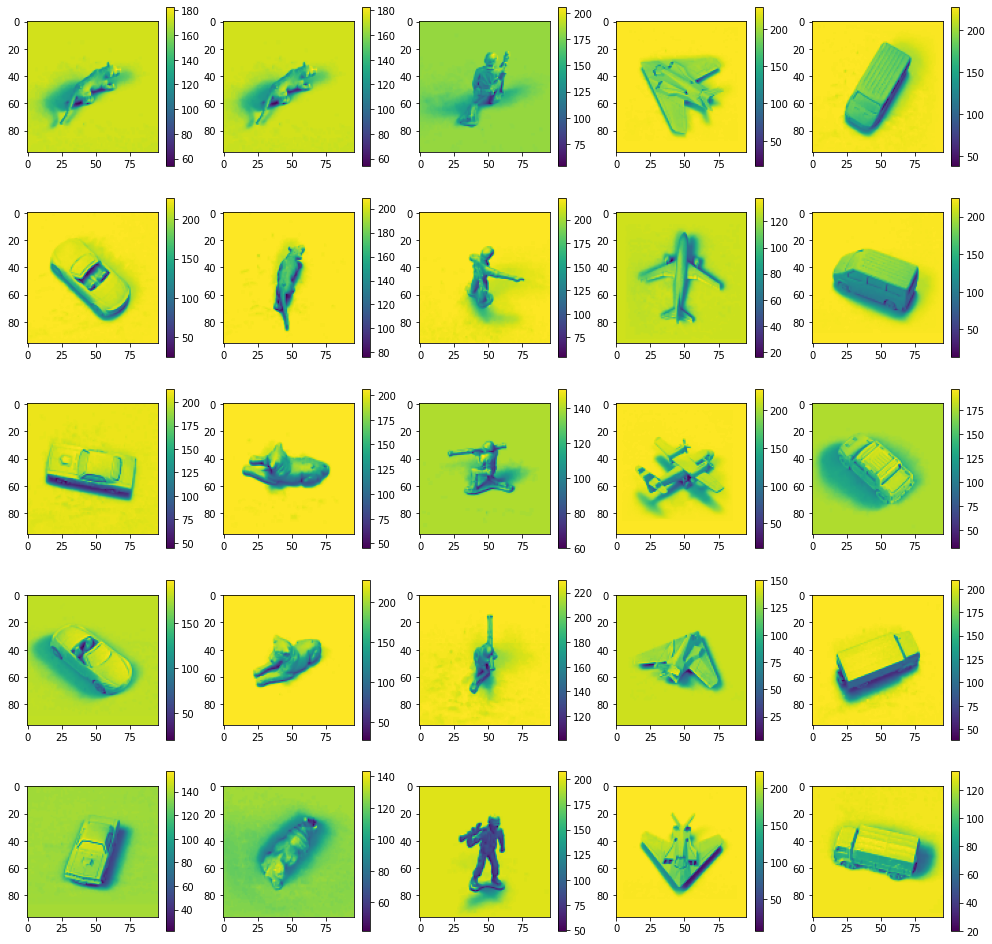

In [8]:
plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_full[i].reshape((96,96)))
    plt.colorbar()
plt.show()

### UMAP

In [12]:
import umap.umap_ as umap

In [10]:
umap_smallnorb = umap.UMAP(random_state=42)

umap_start_time = time.time()
X_umap_smallnorb_embedded = umap_smallnorb.fit_transform(X_full)
umap_end_time = time.time()

TIME_DICT['umap_time'] = umap_end_time - umap_start_time

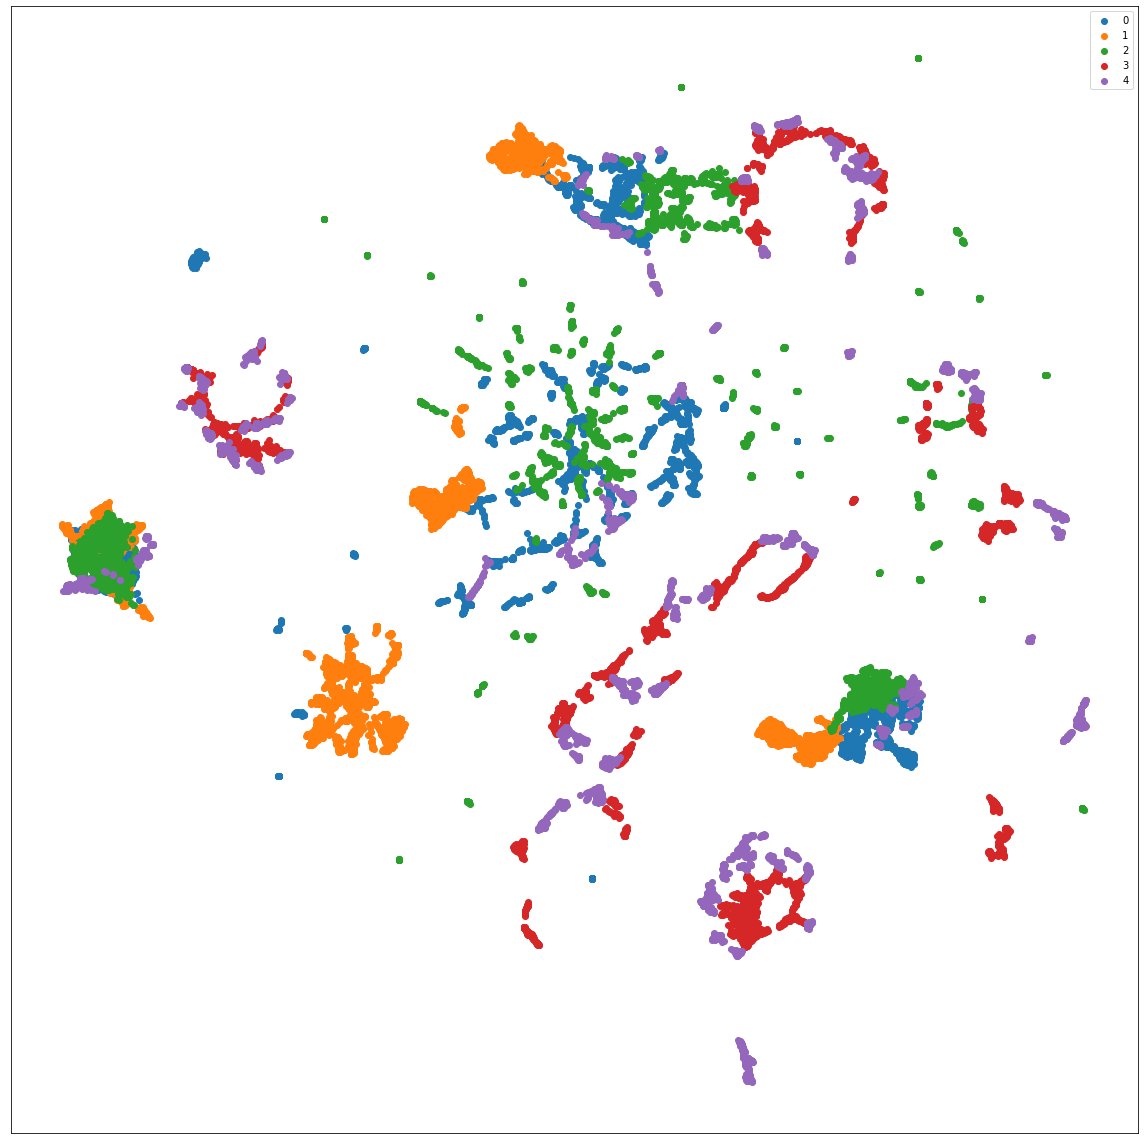

In [56]:
project_into_space(X_umap_smallnorb_embedded, y_full)

In [12]:
save_to_txt(X_umap_smallnorb_embedded, y_full, './smallnorb_embeddings_txt/smallnorb_full_umap_embedding.txt')

In [19]:
TIME_DICT['umap_time']

145.98067688941956

### HUMAP

In [13]:
import humap

In [14]:
hUmap = humap.HUMAP()

humap_start_time = time.time()

hUmap.fit(X_tiny, y_tiny)
humap_embedding_l1 = hUmap.transform(1)

humap_end_time = time.time()

TIME_DICT['humap_time'] = humap_end_time - humap_start_time
y_l1 = hUmap.labels(1)



*************************************************************************
*********************************LEVEL 0*********************************
*************************************************************************

Level 0 with 10000 data samples.
Fitting the first hierarchy level... 
done in 156.799981 seconds.


*************************************************************************
*********************************LEVEL 1*********************************
*************************************************************************

Level 1: 2000 data samples.Computing random walks for sampling selection... 
done in 0.033053 seconds.
Computing random walks for constucting representation neighborhood... 
done in 0.083105 seconds.
Computing similarity among landmarks... 
done in 0.397413 seconds.
Fitting the hierarchy level... 
done in 0.125766 seconds.
Associating data points to landmarks... 
done in 0.003719 seconds.
Storing information for the next hierarchy level... 
done i

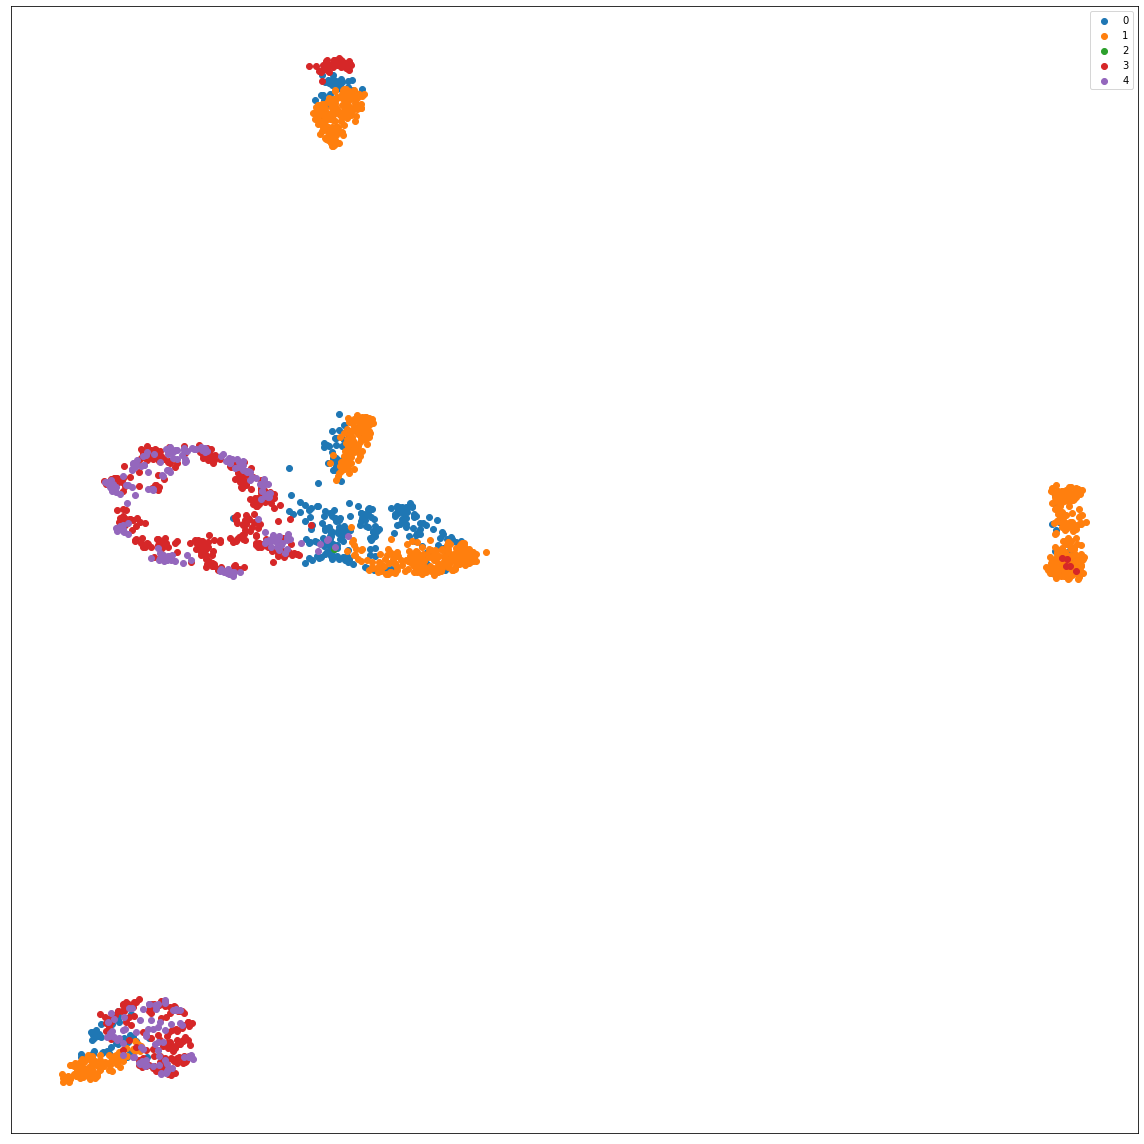

In [57]:
project_into_space(humap_embedding_l1, y_l1)

In [16]:
save_to_txt(humap_embedding_l1, y_l1, './smallnorb_embeddings_txt/smallnorb_tiny_humap_embedding.txt')

In [18]:
TIME_DICT['humap_time']

523.7047369480133

### triMAP

In [14]:
import trimap as trmp

In [21]:
# List to store evaluation time for different metrics
TIME_DICT['trimap_time'] = []

In [22]:
trimap_start_time = time.time()
trimap_embedding_euclidean = trmp.TRIMAP(distance = 'euclidean').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

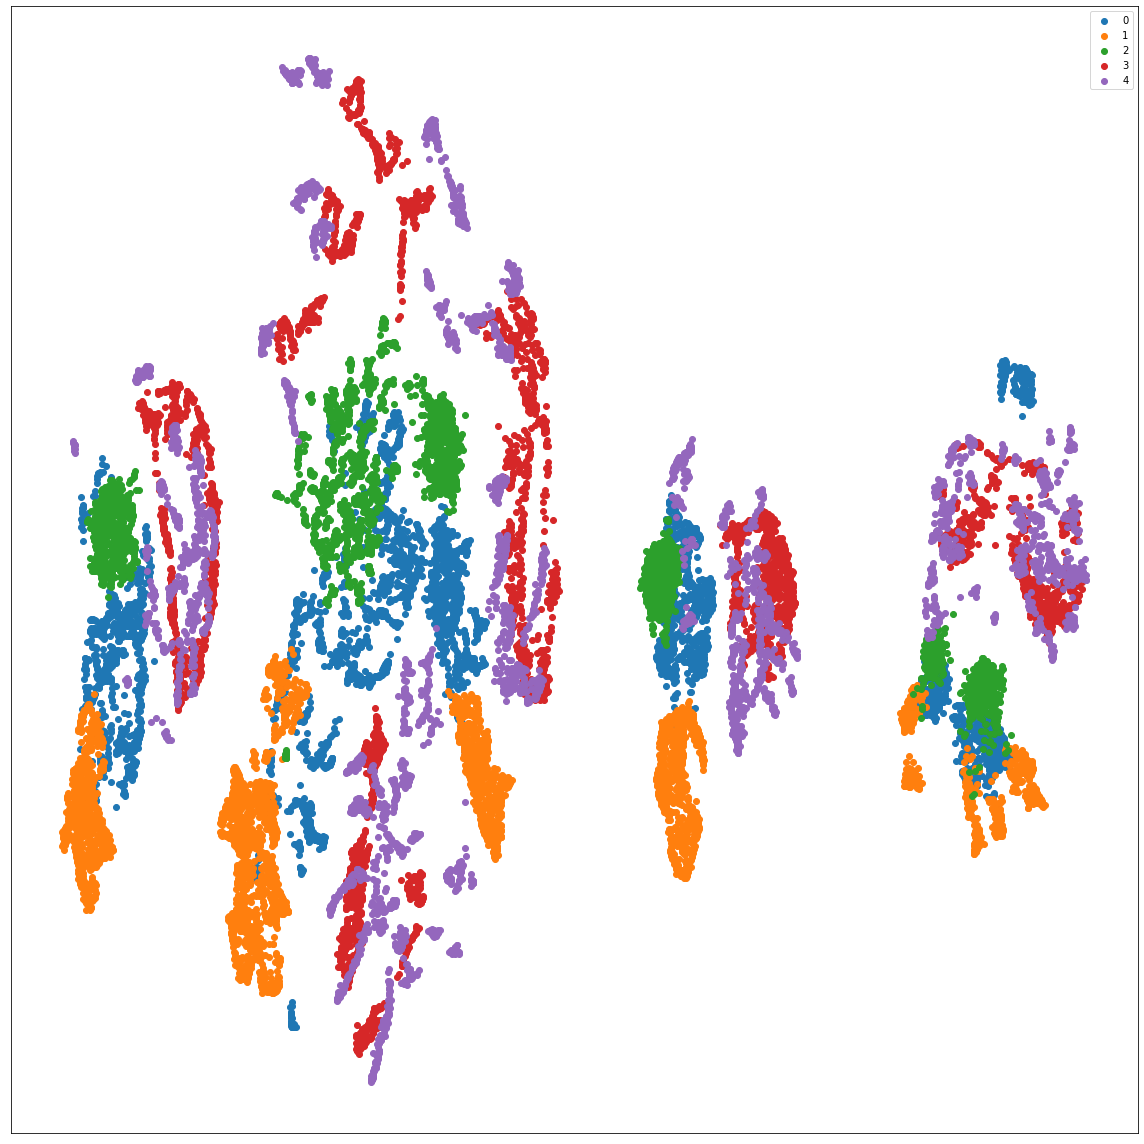

In [58]:
project_into_space(trimap_embedding_euclidean, y_full)

In [25]:
save_to_txt(trimap_embedding_euclidean, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_trimap_euclidean_embedding.txt')

In [26]:
trimap_start_time = time.time()
trimap_embedding_manhattan = trmp.TRIMAP(distance = 'manhattan').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

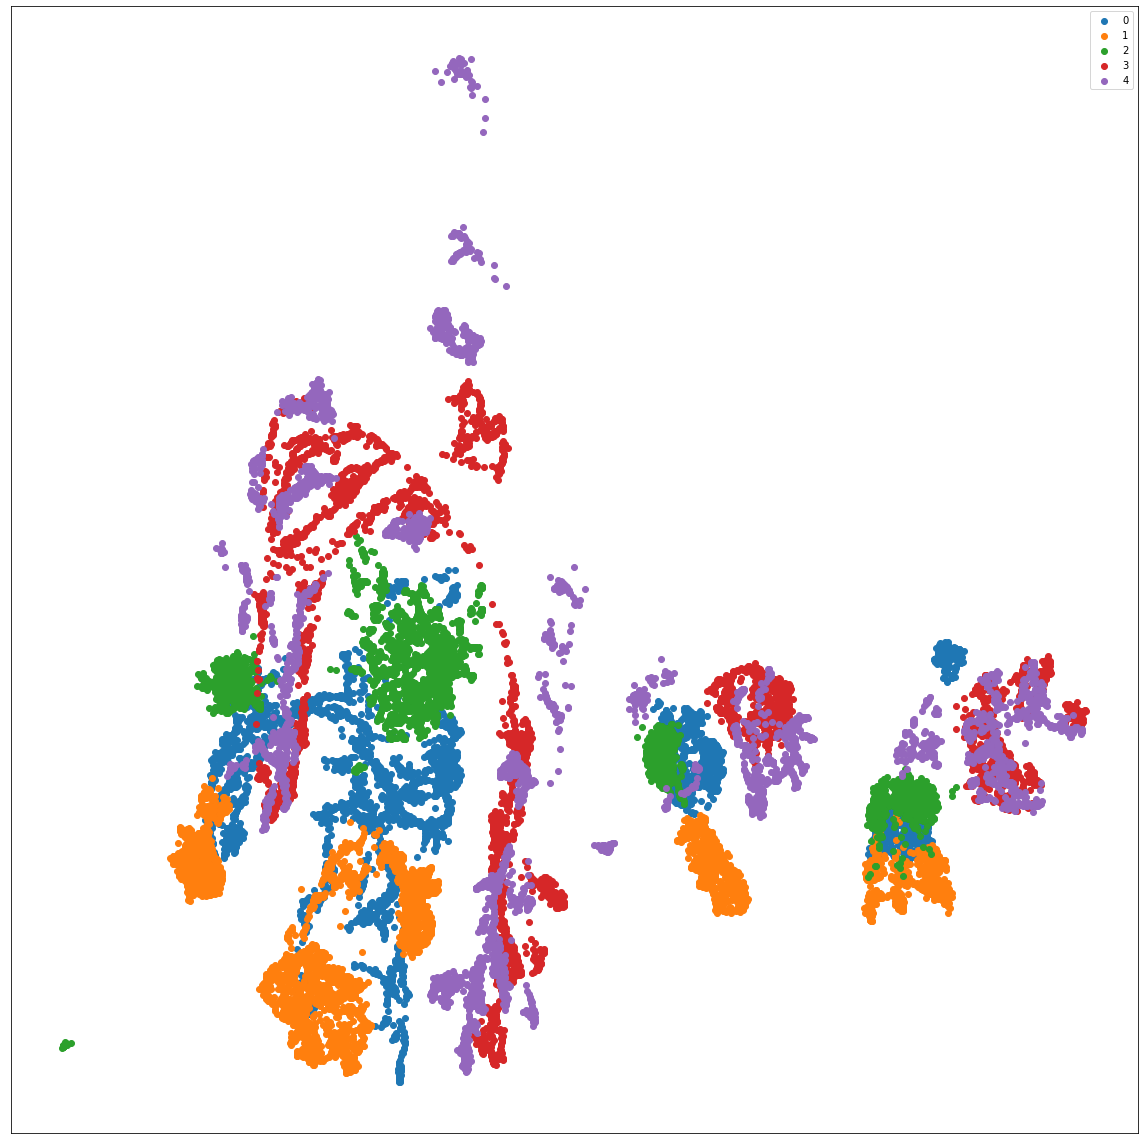

In [27]:
project_into_space(trimap_embedding_manhattan, y_full)

In [28]:
save_to_txt(trimap_embedding_manhattan, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_trimap_manhattan_embedding.txt')

In [29]:
trimap_start_time = time.time()
trimap_embedding_cosine = trmp.TRIMAP(distance = 'cosine').fit_transform(X_full)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

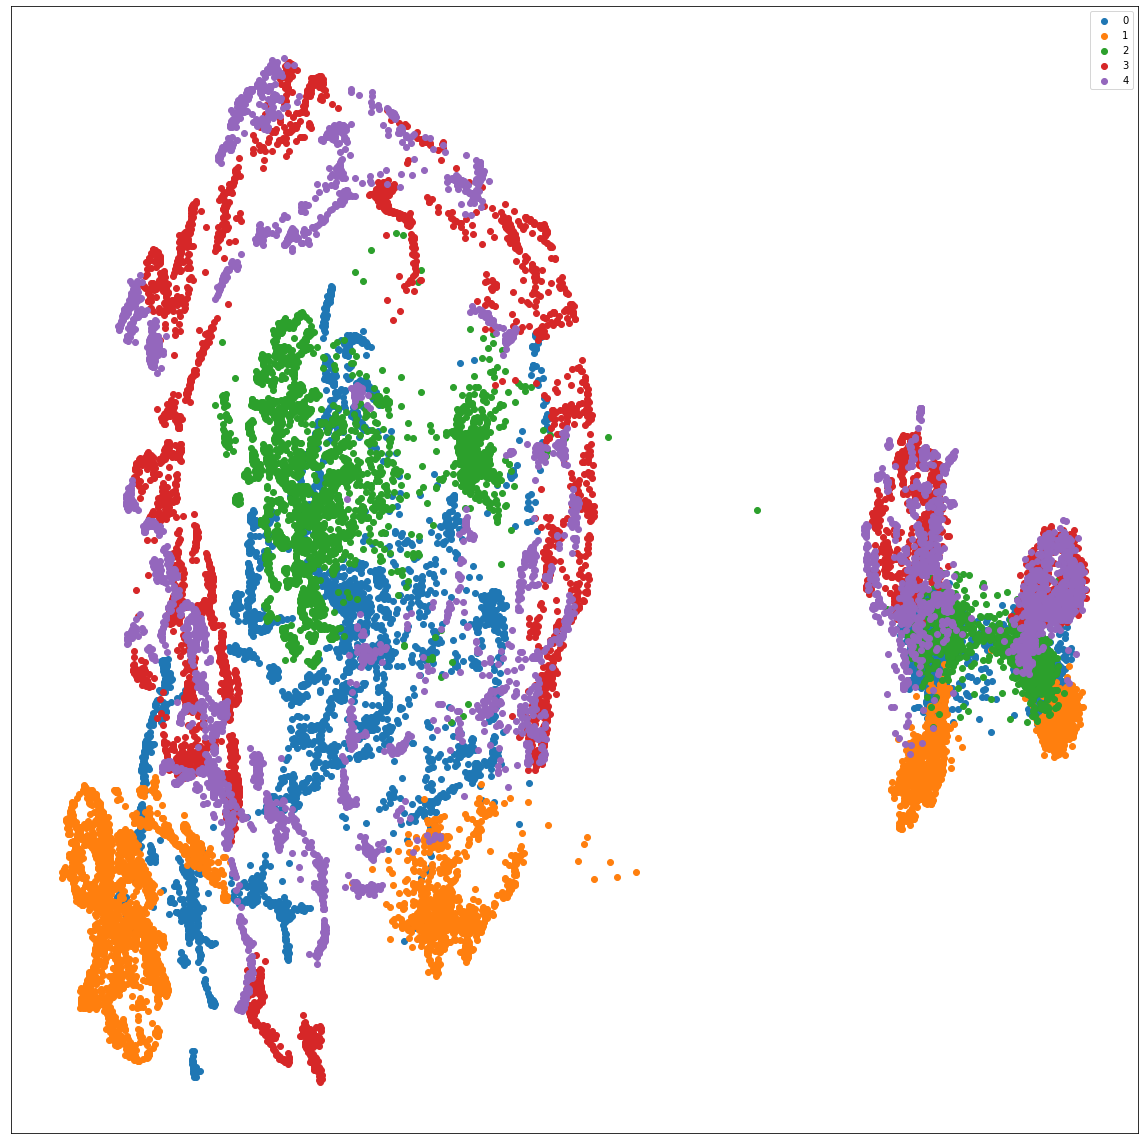

In [30]:
project_into_space(trimap_embedding_cosine, y_full)

In [31]:
save_to_txt(trimap_embedding_cosine, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_trimap_cosine_embedding.txt')

In [33]:
TIME_DICT['trimap_time']

[88.3638117313385, 52.13031578063965, 55.84617900848389]

### PacMAP

In [15]:
import pacmap as pcmp

In [35]:
pacmap_start_time = time.time()
pacmap_embedding = pcmp.PaCMAP().fit_transform(X_full)
pacmap_end_time = time.time()

TIME_DICT['pacmap_time'] = pacmap_end_time - pacmap_start_time

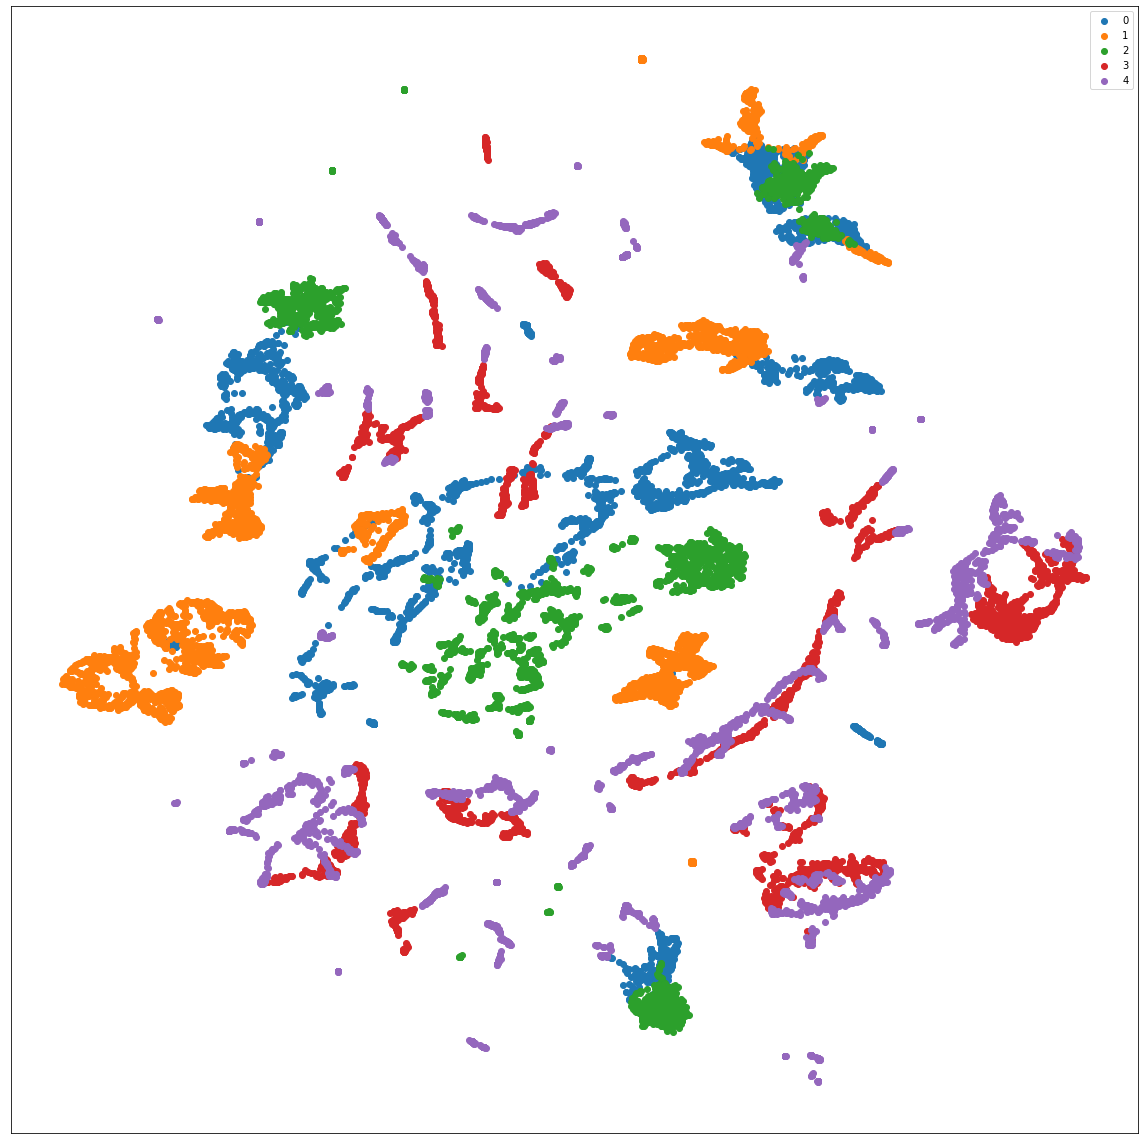

In [36]:
project_into_space(pacmap_embedding, y_full)

In [37]:
save_to_txt(pacmap_embedding, y_full, 
            './smallnorb_embeddings_txt/smallnorb_full_pacmap_embedding.txt')

In [38]:
TIME_DICT['pacmap_time']

42.11976385116577

### Isomap

In [17]:
from sklearn.manifold import Isomap

In [40]:
# List to store evaluation time for different metrics
TIME_DICT['isomap_time'] = []

In [41]:
isomap_start_time = time.time()
isomap_embedding_minkowski = Isomap(n_components = 2, p = 1).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficie

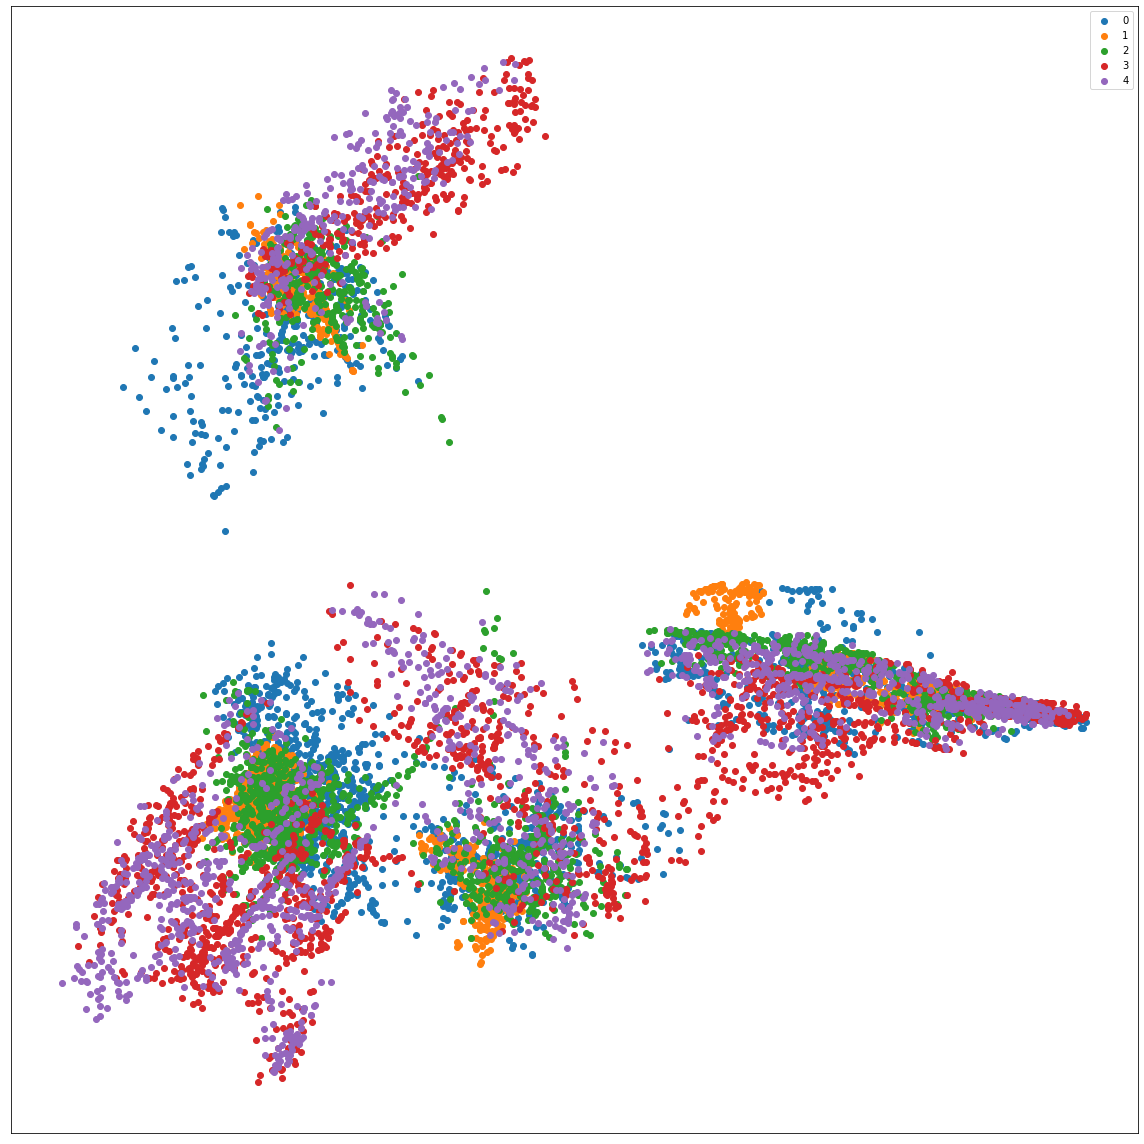

In [42]:
project_into_space(isomap_embedding_minkowski, y_tiny)

In [43]:
save_to_txt(isomap_embedding_minkowski, y_tiny, 
            './smallnorb_embeddings_txt/smallnorb_tiny_isomap_minkowski_embedding.txt')

In [44]:
isomap_start_time = time.time()
isomap_embedding_euclidean = Isomap(n_components = 2, p = 2).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficie

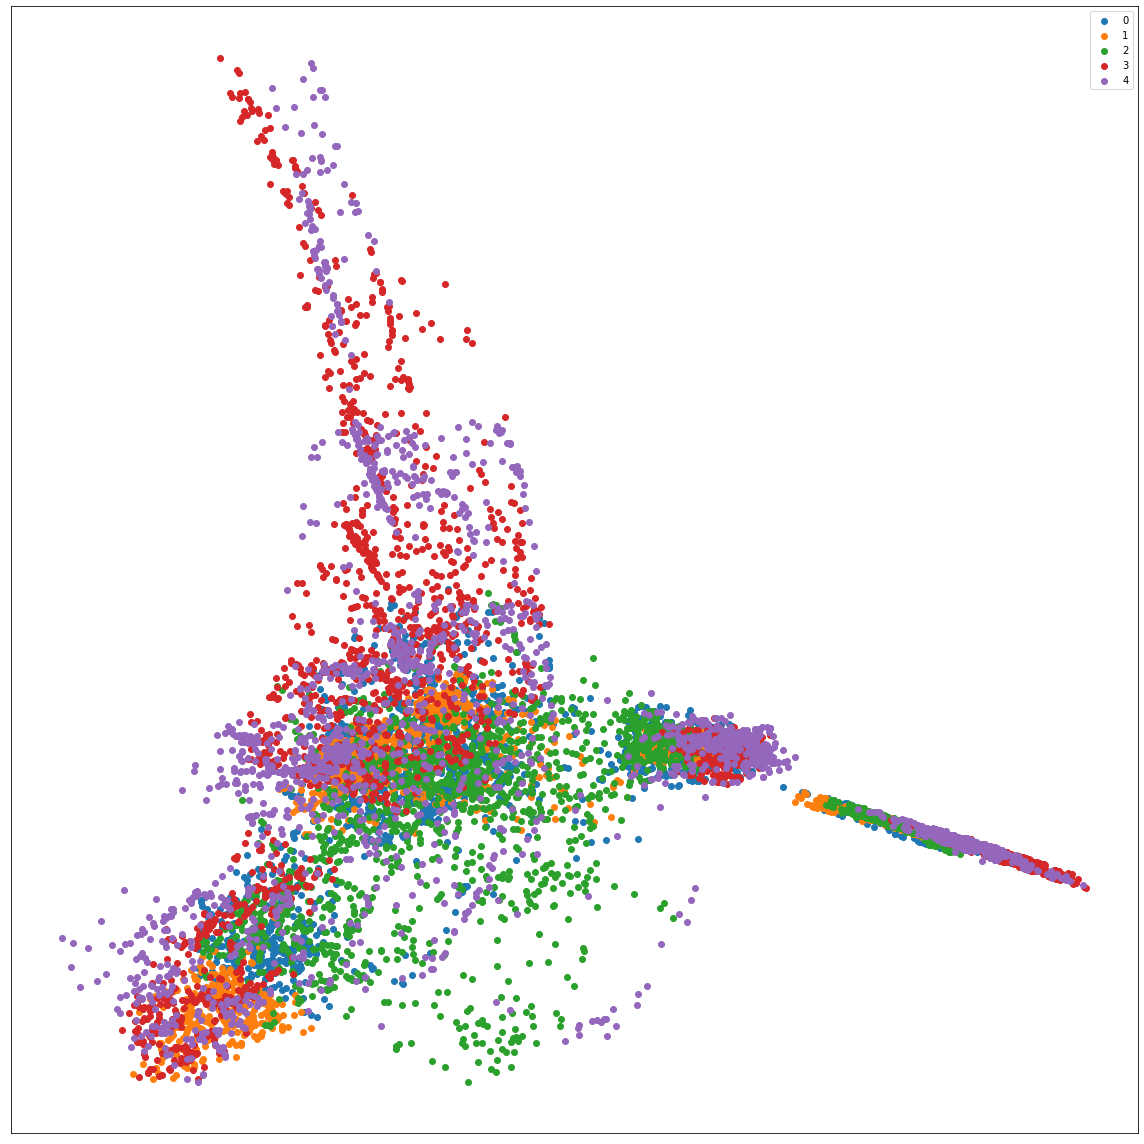

In [45]:
project_into_space(isomap_embedding_euclidean, y_tiny)

In [46]:
save_to_txt(isomap_embedding_euclidean, y_tiny, 
            './smallnorb_embeddings_txt/smallnorb_tiny_isomap_euclidean_embedding.txt')

In [47]:
isomap_start_time = time.time()
isomap_embedding_cosine = Isomap(n_components = 2, metric = 'cosine').fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


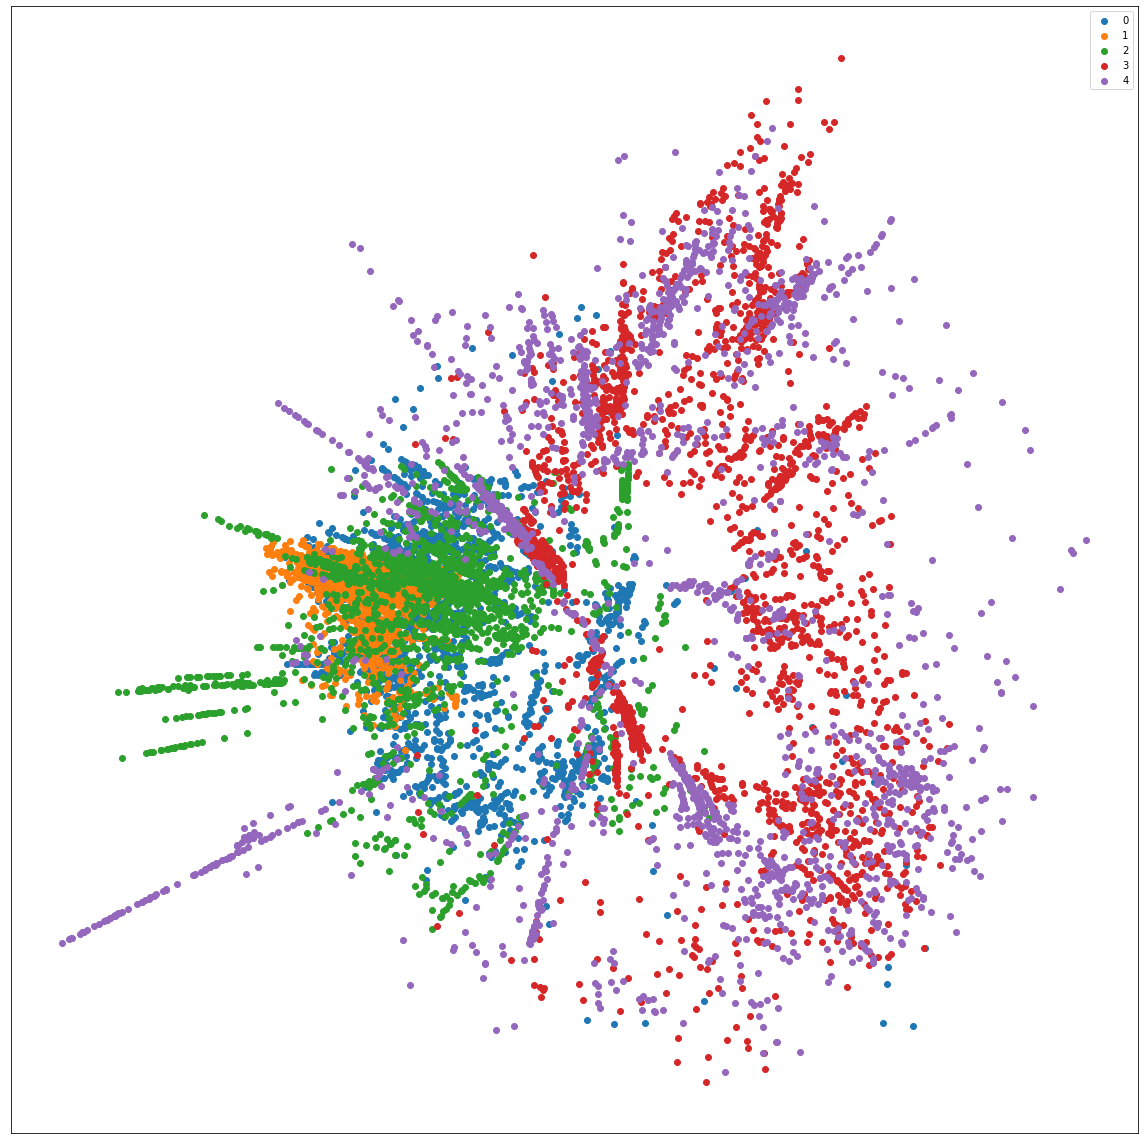

In [48]:
project_into_space(isomap_embedding_cosine, y_tiny)

In [49]:
save_to_txt(isomap_embedding_cosine, y_tiny, 
            './smallnorb_embeddings_txt/smallnorb_tiny_isomap_cosine_embedding.txt')

In [50]:
TIME_DICT['isomap_time']

[958.3455512523651, 194.22284150123596, 118.5497579574585]

## IVHD

### Euclidean metric

In [27]:
# 3N, 3500 iterations
ivhd_euclidean_3N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_euclidean_3N_3500_iter.txt',
                                           header = None)

In [28]:
ivhd_euclidean_3N_3500_iter = ivhd_euclidean_3N_3500_iter.iloc[:, :3]

In [29]:
ivhd_euclidean_3N_3500_iter.columns = ['x', 'y', 'label']
ivhd_euclidean_3N_3500_iter.head(10)

x         y  label
0  0.399544  0.431206      0
1  0.399690  0.431372      0
2  0.517734  0.416604      1
3 -0.801941 -0.002730      2
4 -0.320345  0.323972      3
5  0.270814 -0.146705      4
6  0.628323 -0.386551      0
7  0.255304  0.187977      1
8 -0.481902 -0.389516      2
9  0.255938  0.614309      3

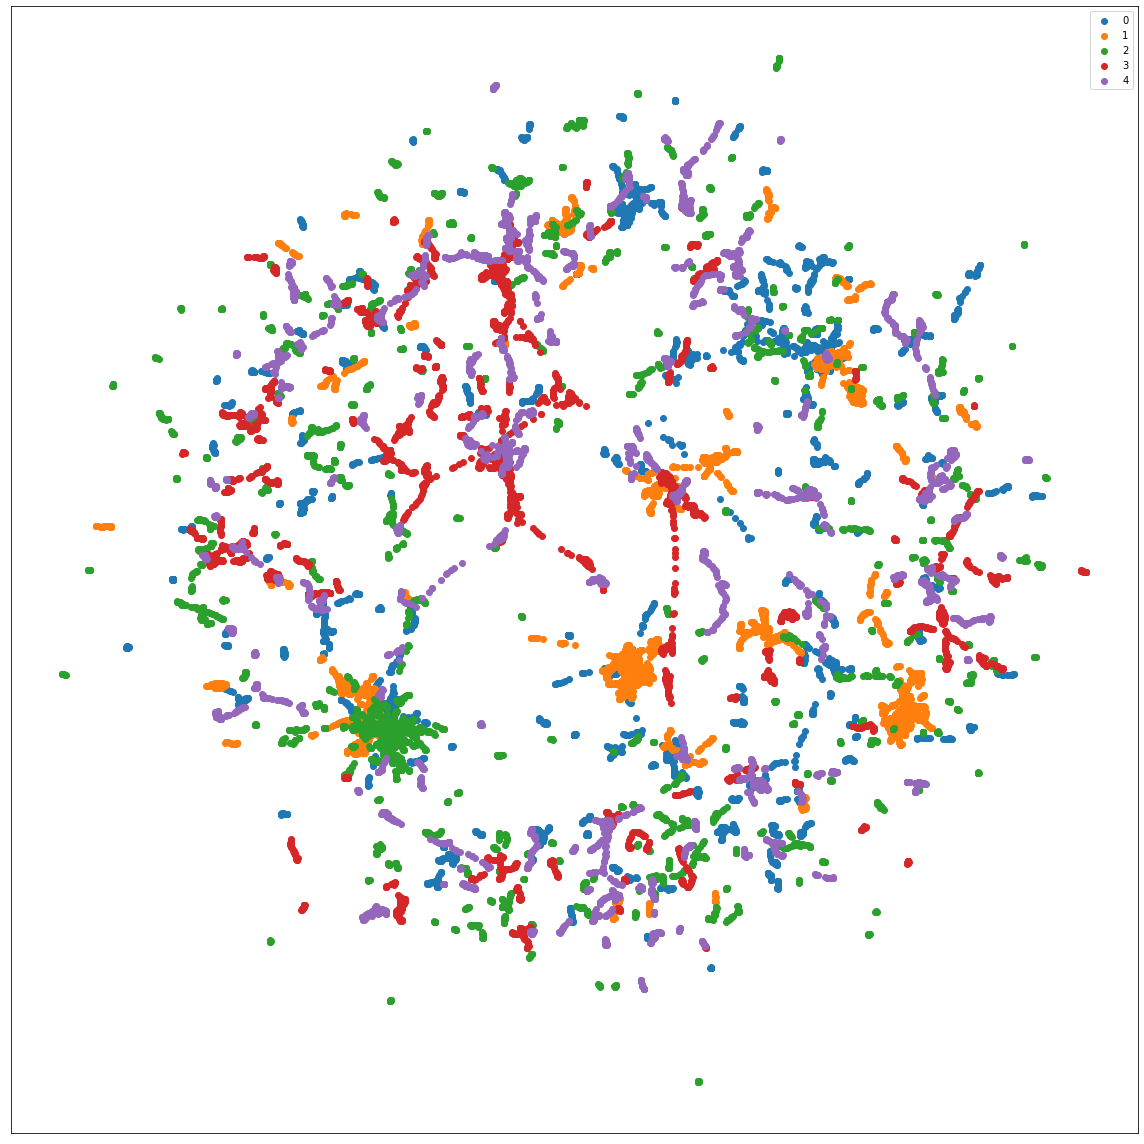

In [30]:
project_into_space(ivhd_euclidean_3N_3500_iter.values[:,:2], ivhd_euclidean_3N_3500_iter.values[:, -1])

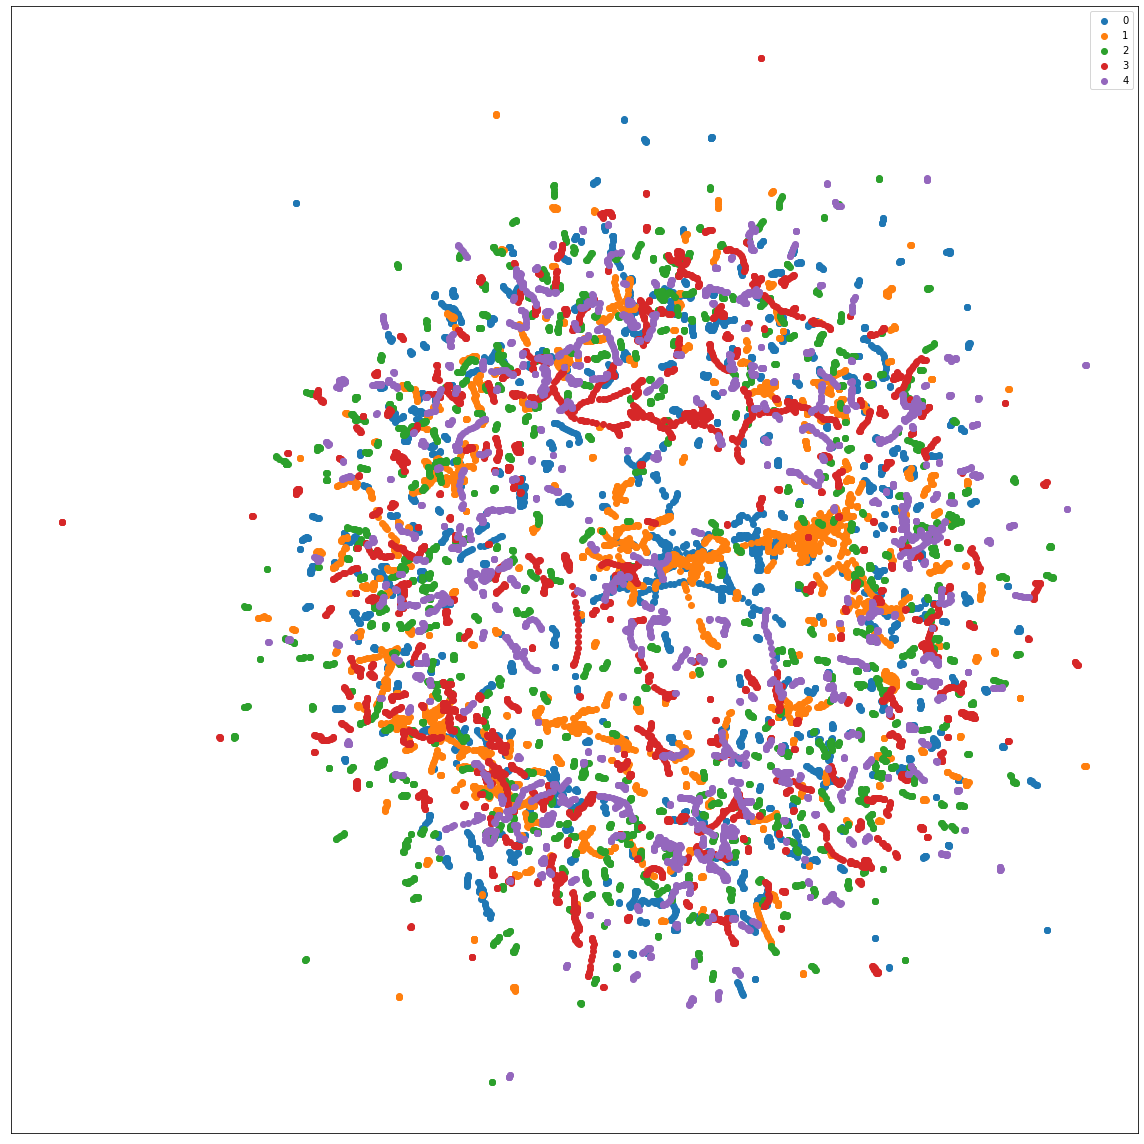

In [31]:
# 2N, 3500 iterations
ivhd_euclidean_2N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_euclidean_2N_3500_iter.txt',
                                           header = None)
ivhd_euclidean_2N_3500_iter = ivhd_euclidean_2N_3500_iter.iloc[:, :3]
ivhd_euclidean_2N_3500_iter.columns = ['x', 'y', 'label']
project_into_space(ivhd_euclidean_2N_3500_iter.values[:,:2], ivhd_euclidean_2N_3500_iter.values[:, -1])

### Cosine metric

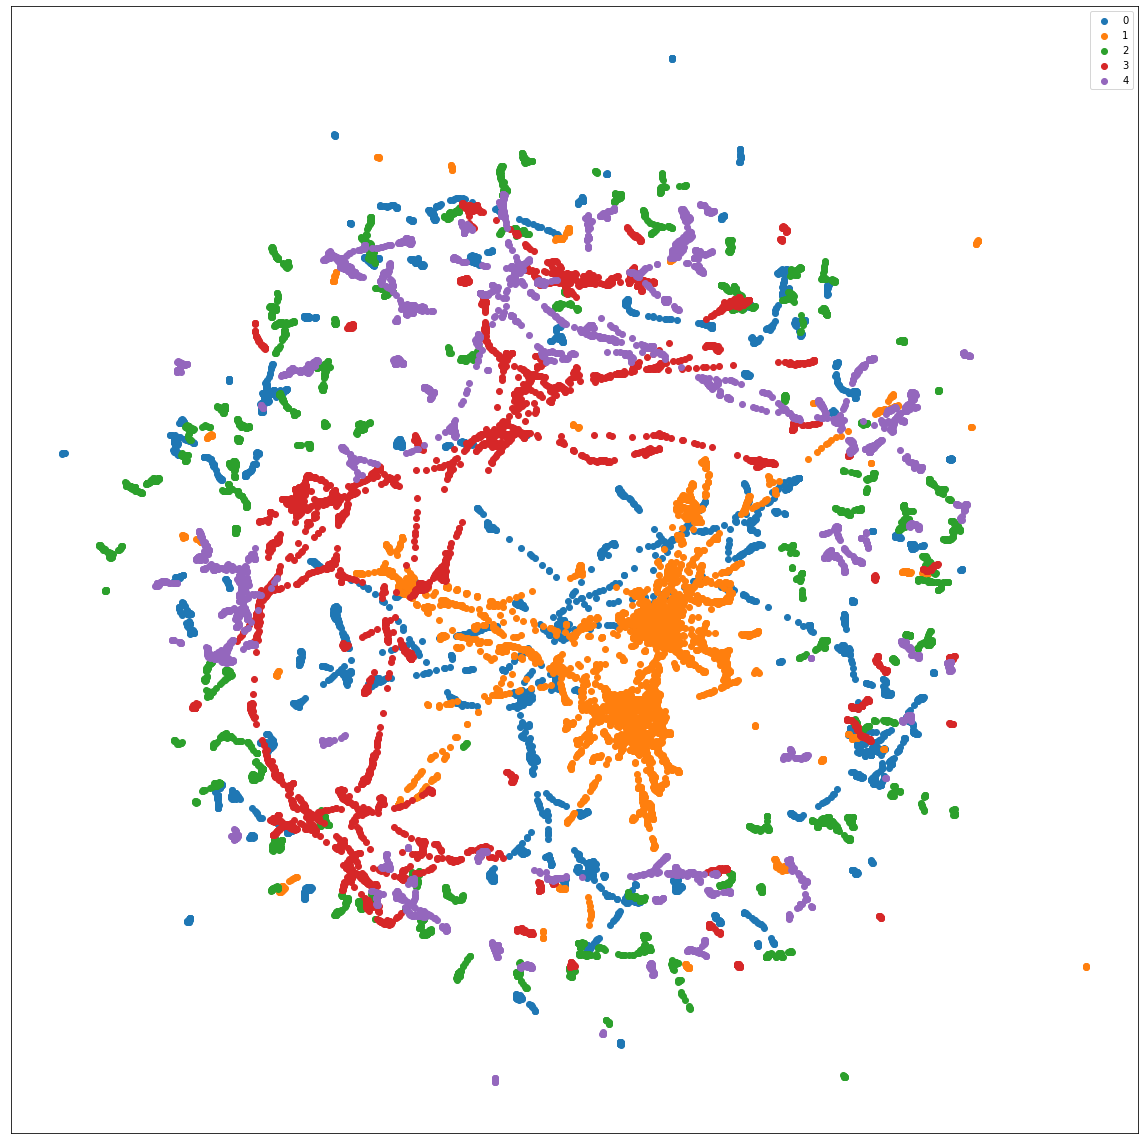

In [32]:
# 3N, 3500 iterations
ivhd_cosine_3N_3500_iter  = ivhd_cosine_3N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_cosine_3N_3500_iter.txt',
                                           header = None)
ivhd_cosine_3N_3500_iter = ivhd_cosine_3N_3500_iter.iloc[:, :3]
ivhd_cosine_3N_3500_iter.columns = ['x', 'y', 'label']
project_into_space(ivhd_cosine_3N_3500_iter.values[:,:2], ivhd_cosine_3N_3500_iter.values[:, -1])

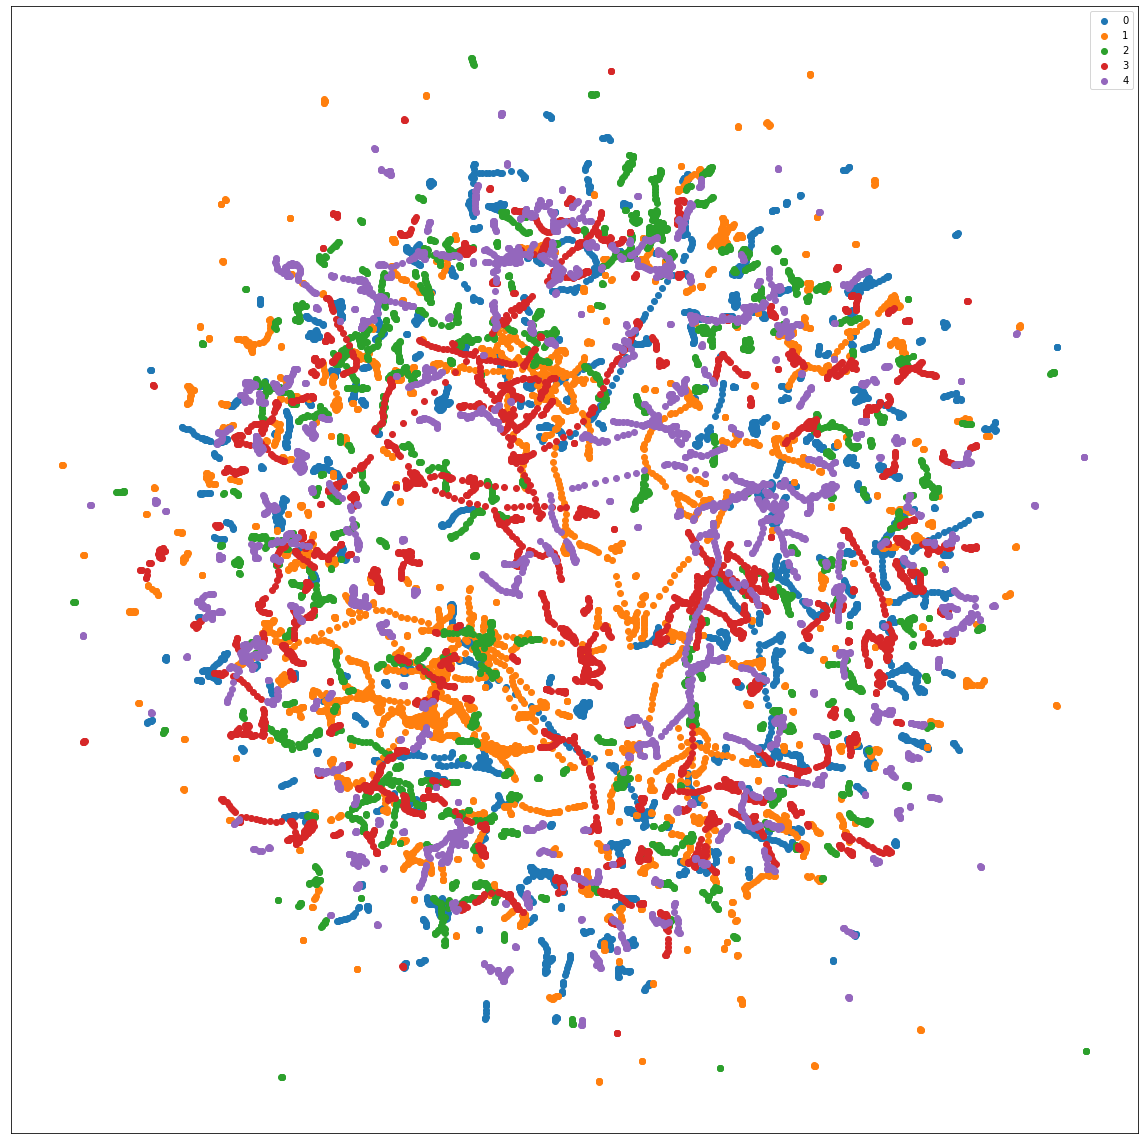

In [33]:
# 2N, 3500 iterations
ivhd_cosine_2N_3500_iter  = pd.read_csv(
    './smallnorb_embeddings_txt/smallnorb_full_ivhd_cosine_2N_3500_iter.txt',
                                           header = None)
ivhd_cosine_2N_3500_iter = ivhd_cosine_2N_3500_iter.iloc[:, :3]
ivhd_cosine_2N_3500_iter.columns = ['x', 'y', 'label']
project_into_space(ivhd_cosine_2N_3500_iter.values[:,:2], ivhd_cosine_2N_3500_iter.values[:, -1])

## Metrics

### Local score

In [60]:
import local_score

Calculating d_hd
umap
Calculating d_hd
trimap
Calculating d_hd
pacmap
Calculating d_hd
IVHD
Finished.


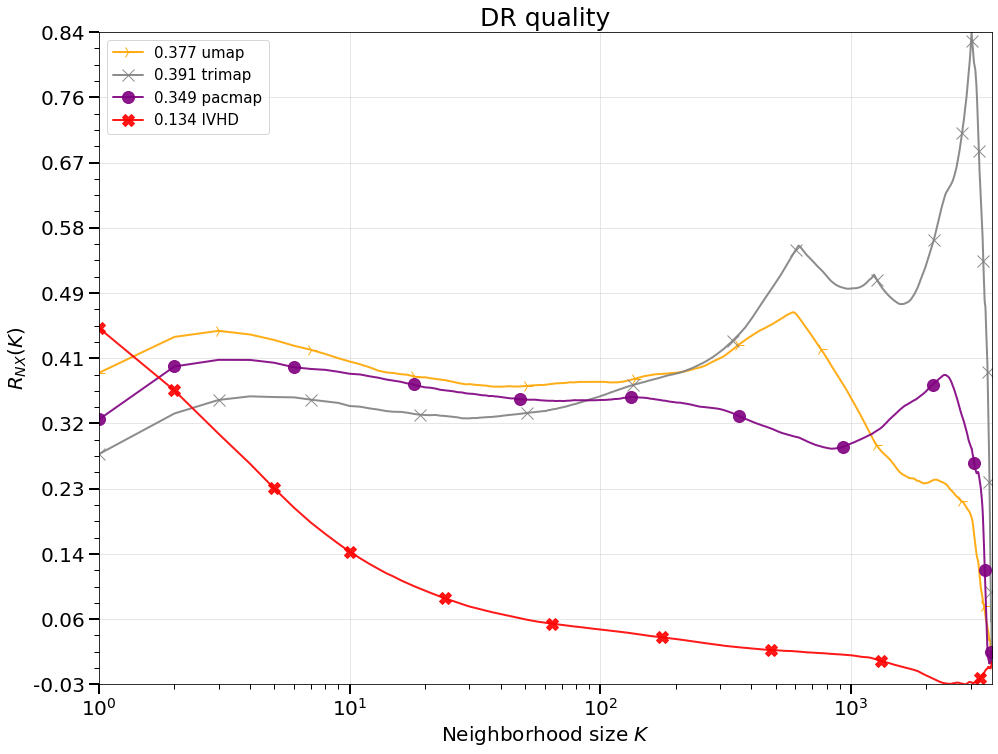

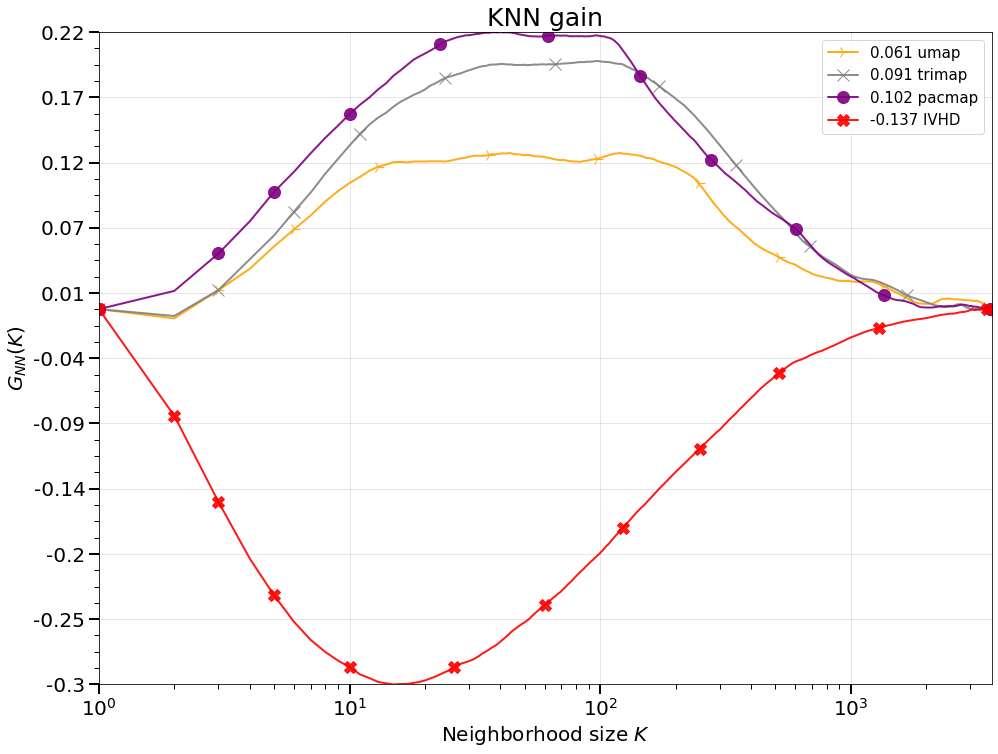

In [76]:
local_metrics = local_score.LocalMetric()

dataset = X_full
labels = y_full

X_embedded = X_umap_smallnorb_embedded
method_name = "umap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

# X_embedded = humap_embedding_l2
# method_name = "humap"

# local_metrics.calculate_knn_gain_and_dr_quality(
#     X_lds=X_embedded,
#     X_hds=dataset,
#     labels=np.array(labels),
#     method_name=method_name
# )

X_embedded = trimap_embedding_manhattan
method_name = "trimap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = pacmap_embedding
method_name = "pacmap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

# X_embedded = isomap_embedding_cosine
# method_name = "isomap"

# local_metrics.calculate_knn_gain_and_dr_quality(
#     X_lds=X_embedded,
#     X_hds=dataset,
#     labels=np.array(labels),
#     method_name=method_name
# )

X_embedded = ivhd_euclidean_2N_3500_iter.values[:,:2]
method_name = "IVHD"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

local_metrics.visualize()

### Distance matrices

In [87]:
umap_embedding_tiny = X_umap_smallnorb_embedded[:SAMPLE_SIZE_TINY]
humapl1_embedding_tiny = humap_embedding_l1[:SAMPLE_SIZE_TINY]
isomap_embedding_euclidean_tiny = isomap_embedding_euclidean[:SAMPLE_SIZE_TINY]
pacmap_embedding_tiny = pacmap_embedding[:SAMPLE_SIZE_TINY]
trimap_embedding_euclidean_tiny = trimap_embedding_euclidean[:SAMPLE_SIZE_TINY]
ivhd_embedding_euclidean_2N_3500_iter_tiny = ivhd_euclidean_2N_3500_iter[:SAMPLE_SIZE_TINY]

dist_mx_humapl1_tiny = distance_matrix(humapl1_embedding_tiny, humapl1_embedding_tiny)
dist_mx_umap_tiny = distance_matrix(umap_embedding_tiny, umap_embedding_tiny)
dist_mx_isomap_tiny_eucl = distance_matrix(isomap_embedding_euclidean_tiny, isomap_embedding_euclidean_tiny)
dist_mx_pacmap_tiny = distance_matrix(pacmap_embedding_tiny, pacmap_embedding_tiny)
dist_mx_trimap_tiny_eucl = distance_matrix(trimap_embedding_euclidean_tiny, trimap_embedding_euclidean_tiny)
dist_mx_ivhd_tiny = distance_matrix(ivhd_embedding_euclidean_2N_3500_iter_tiny, ivhd_embedding_euclidean_2N_3500_iter_tiny)

In [35]:
from scipy.spatial import distance_matrix

# X is a design matrix which belongs to space R^{n x 2}, y is a vector of labels
def calculate_metric(X, y):
    """Function returns a value of metric specified in the exercise"""
    
    df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    df['labels'] = y
    dist_same_class = []
    n_elem_same_class = []
    dist_different_class = []
    n_elem_different_class = []
    y_unique = df['labels'].drop_duplicates()
    
    for label in y_unique:
        points_same_class = df[df['labels'] == label]
        points_different_class = df[df['labels'] != label]
        
        dist_mat_same_class = distance_matrix(points_same_class, points_same_class, p=2)
        dist_mat_different_class = distance_matrix(points_same_class, points_different_class, p=2)

        # Sum over upper triangular of dist_mat matrix, we can do that this way because of this method is effective
        dist_same_class.append((dist_mat_same_class.sum() - np.trace(dist_mat_same_class).sum())/2)
        
        reshaped_dist_mat_different_class = np.reshape(dist_mat_different_class,newshape = (1, -1))
        dist_different_class.append(np.sum(reshaped_dist_mat_different_class))
        
        # Elements in upper triangular distance matrix between points from the same class without counting elements from diagonal
        n_elem_same_class.append(((dist_mat_same_class.shape[0])**2 - dist_mat_same_class.shape[0]) / 2)
        n_elem_different_class.append(len(dist_different_class))
        
    numerator = np.sum(dist_same_class) / np.sum(n_elem_same_class)
    denominator = np.sum(dist_different_class) / np.sum(n_elem_different_class)
    
    # We use -log() function to get positive (in most cases) "bigger" number, without log operation we have very small value
    return -round(np.log(numerator / denominator), 3)

### Trustworthiness

In [96]:
def calculate_trust(dataset, embedding, name):
    """Function returns calculated trustworthiness measure"""
    
    from sklearn.manifold import trustworthiness    
    print(f"{name} done!")
    
    return trustworthiness(dataset, embedding)


In [90]:
umap_trust_tiny = calculate_trust(X_tiny, umap_embedding_tiny, "Umap tiny")

isomap_trust_tiny_eucl = calculate_trust(X_tiny, isomap_embedding_euclidean_tiny, "Isomap tiny euclidean")

pacmap_trust_tiny = calculate_trust(X_tiny, pacmap_embedding_tiny, "Pacmap tiny")

trimap_trust_tiny_eucl = calculate_trust(X_tiny, trimap_embedding_euclidean_tiny, "Trimap tiny euclidean")

ivhd_trust_tiny_eucl_2N_3500_iter = calculate_trust(X_tiny, ivhd_embedding_euclidean_2N_3500_iter_tiny, "IVHD tiny")

Umap tiny done!
Isomap tiny euclidean done!
Pacmap tiny done!
Trimap tiny euclidean done!
IVHD tiny done!


In [92]:
TRUSTWORTHINESS_DICT['umap'] = umap_trust_tiny
TRUSTWORTHINESS_DICT['isomap'] = isomap_trust_tiny_eucl
TRUSTWORTHINESS_DICT['pacmap'] = pacmap_trust_tiny
TRUSTWORTHINESS_DICT['trimap'] = trimap_trust_tiny_eucl
TRUSTWORTHINESS_DICT['ivhd'] = ivhd_trust_tiny_eucl_2N_3500_iter

In [93]:
TRUSTWORTHINESS_DICT

{'umap': 0.9886729303442754,
 'humap': None,
 'trimap': 0.9847225040032026,
 'pacmap': 0.9873609987990393,
 'isomap': 0.8766733827061649,
 'ivhd': 0.883405904723779}

In [103]:
with open('./smallnorb_metrics/smallnorb_trust_metric.txt','w') as data: 
      data.write(str(TRUSTWORTHINESS_DICT))

### Shepard diagrams

In [39]:
def plot_shepard_diagram(distance_matrix_embedded, distance_matrix_original):
    """Function plots diagram dependecy between distance of two points in output space and between corresponding points
        in input space
    """
    
    try:
        distance_matrix_embedded = np.matrix(distance_matrix_embedded)
        distance_matrix_original = np.matrix(distance_matrix_original)
    except:
        print('Arguments should be able to convert to matrix-like objects')
        return None
    
    # Triangular matrices
    m = distance_matrix_embedded.shape[0]
    r, c = np.triu_indices(m,1)
    
    dist_vec_embedded = np.array(distance_matrix_embedded[r, c])
    dist_vec_original = np.array(distance_matrix_original[r, c])

    dist_vec_embedded_reshaped = np.reshape(dist_vec_embedded, -1)
    dist_vec_original_reshaped = np.reshape(dist_vec_original, -1)
    
    plt.figure(figsize=(16, 16), dpi=80)
    plt.scatter(dist_vec_embedded_reshaped, dist_vec_original_reshaped)
    plt.grid(True)
    plt.show()


In [53]:
SAMPLE_SIZE_TINY_TINY = 500
X_tiny_tiny = X_full[:SAMPLE_SIZE_TINY_TINY]

Tiny tiny embeddings

In [54]:
umap_smallnorb_tiny_tiny = umap.UMAP(random_state=42)
X_umap_smallnorb_embedding_tiny_tiny = umap_smallnorb_tiny_tiny.fit_transform(X_tiny_tiny)

In [55]:
trimap_embedding_euclidean_tiny_tiny = trmp.TRIMAP(distance = 'euclidean').fit_transform(X_tiny_tiny)

In [56]:
pacmap_embedding_tiny_tiny = pcmp.PaCMAP().fit_transform(X_tiny_tiny)

In [57]:
isomap_embedding_euclidean_tiny_tiny = Isomap(n_components = 2, p = 1).fit_transform(X_tiny_tiny)

/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/patryk/notebook/jupyterenv/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficie

Distance matrices for tiny tiny embeddings and original dataset.

In [58]:
dist_mx_X_tiny_tiny = distance_matrix(X_tiny_tiny, X_tiny_tiny, p=2)

In [59]:
umap_embedding_tiny_tiny = X_umap_smallnorb_embedding_tiny_tiny
isomap_embedding_euclidean_tiny_tiny = isomap_embedding_euclidean_tiny_tiny
pacmap_embedding_tiny_tiny = pacmap_embedding_tiny_tiny
trimap_embedding_euclidean_tiny_tiny = trimap_embedding_euclidean_tiny_tiny
ivhd_embedding_euclidean_2N_3500_iter_tiny_tiny = ivhd_euclidean_2N_3500_iter[:SAMPLE_SIZE_TINY_TINY]

dist_mx_umap_tiny_tiny = distance_matrix(umap_embedding_tiny_tiny, umap_embedding_tiny_tiny)
dist_mx_isomap_tiny_tiny_eucl = distance_matrix(isomap_embedding_euclidean_tiny_tiny, isomap_embedding_euclidean_tiny_tiny)
dist_mx_pacmap_tiny_tiny = distance_matrix(pacmap_embedding_tiny_tiny, pacmap_embedding_tiny_tiny)
dist_mx_trimap_tiny_tiny_eucl = distance_matrix(trimap_embedding_euclidean_tiny_tiny, trimap_embedding_euclidean_tiny_tiny)
dist_mx_ivhd_tiny_tiny = distance_matrix(ivhd_embedding_euclidean_2N_3500_iter_tiny_tiny, ivhd_embedding_euclidean_2N_3500_iter_tiny_tiny)

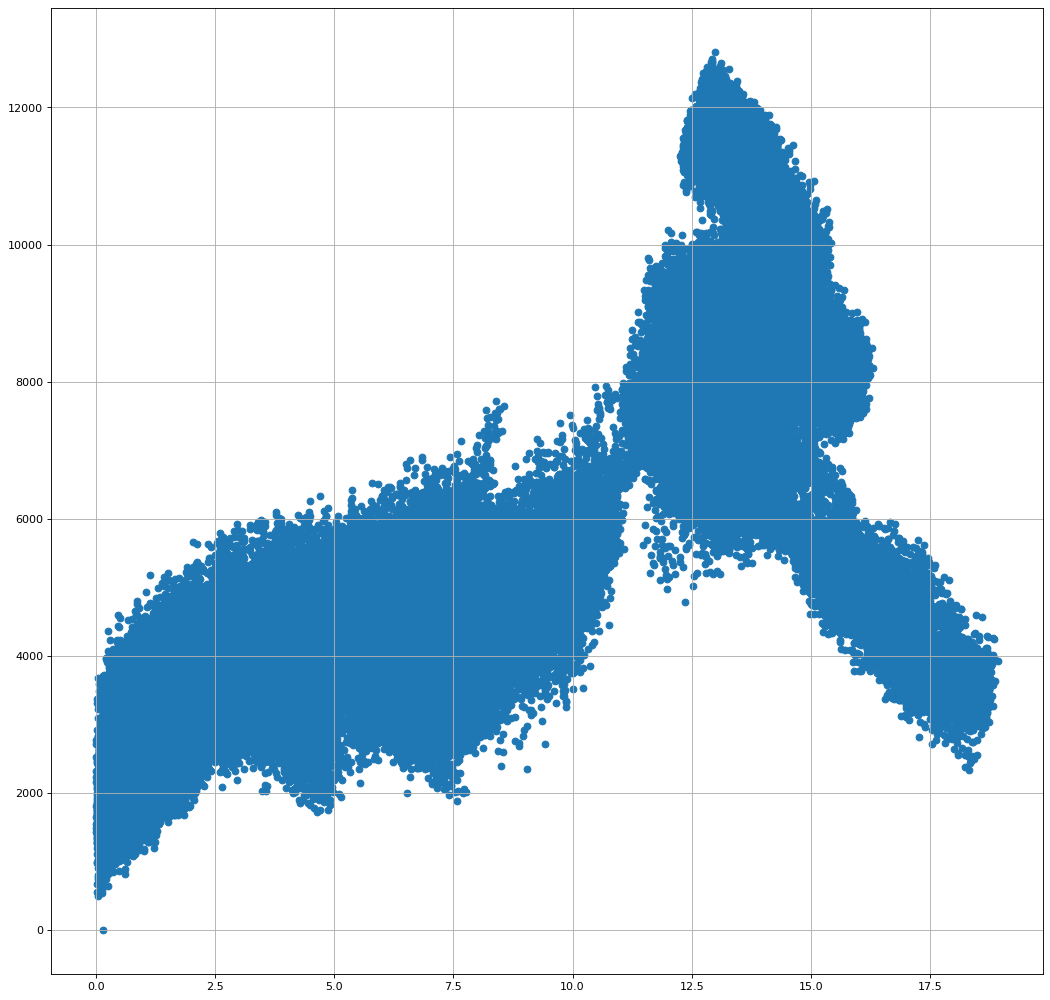

In [60]:
plot_shepard_diagram(dist_mx_umap_tiny_tiny, dist_mx_X_tiny_tiny)

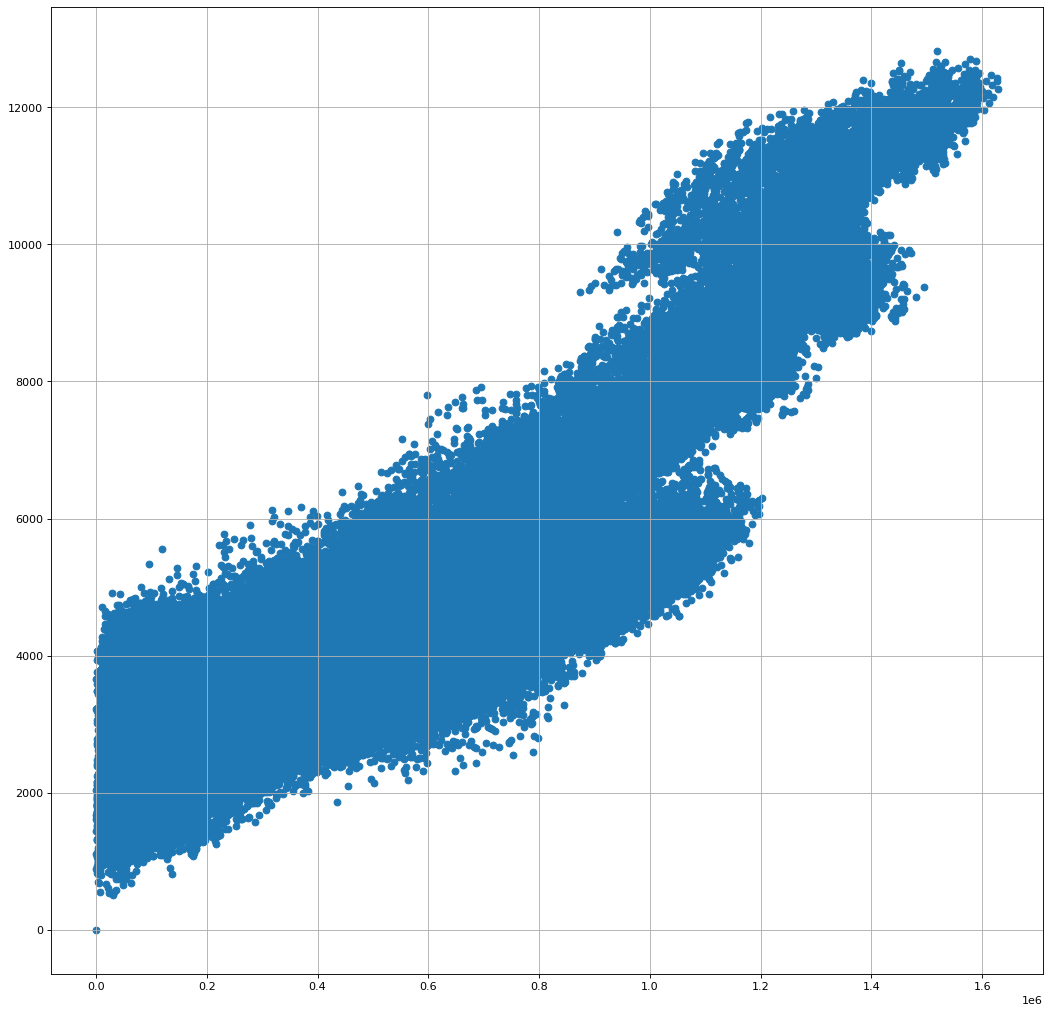

In [41]:
plot_shepard_diagram(dist_mx_isomap_tiny_eucl, dist_mx_X_tiny_tiny)

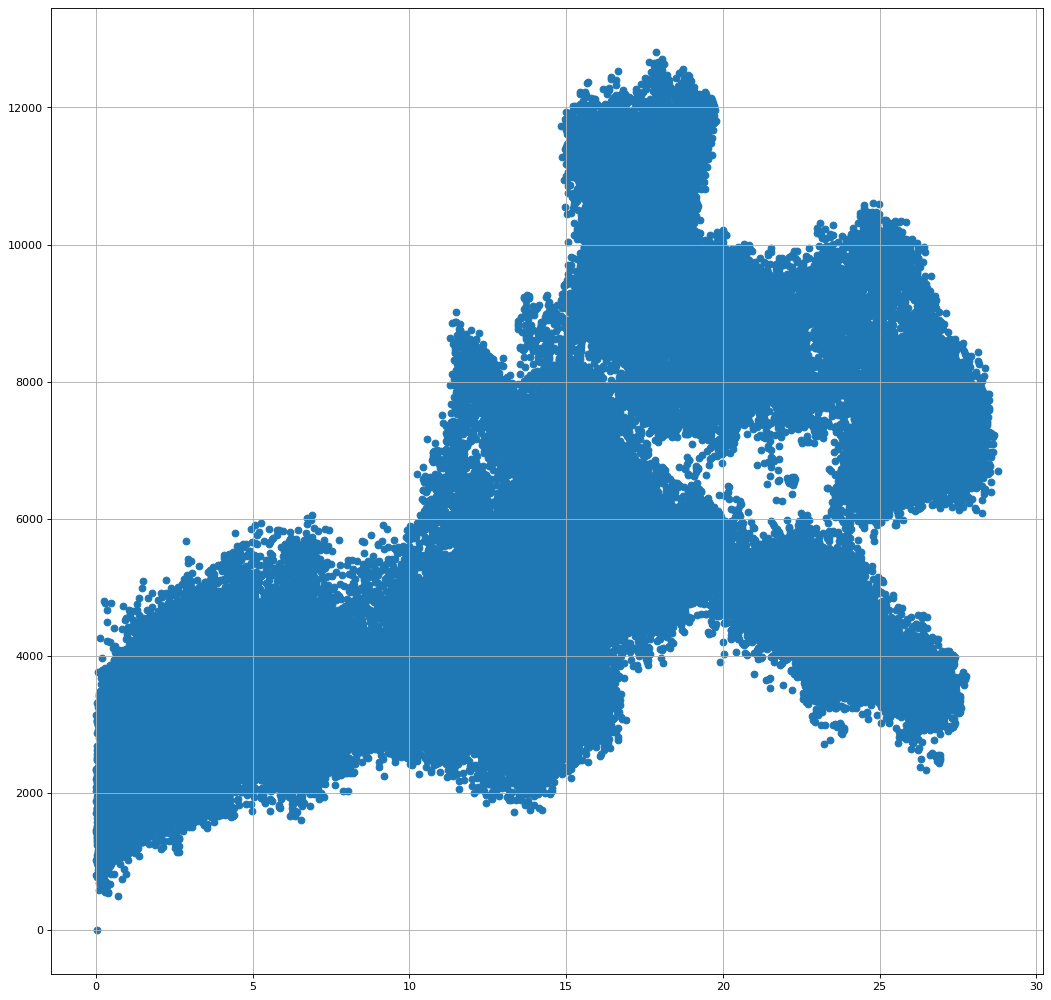

In [61]:
plot_shepard_diagram(dist_mx_pacmap_tiny_tiny, dist_mx_X_tiny_tiny)

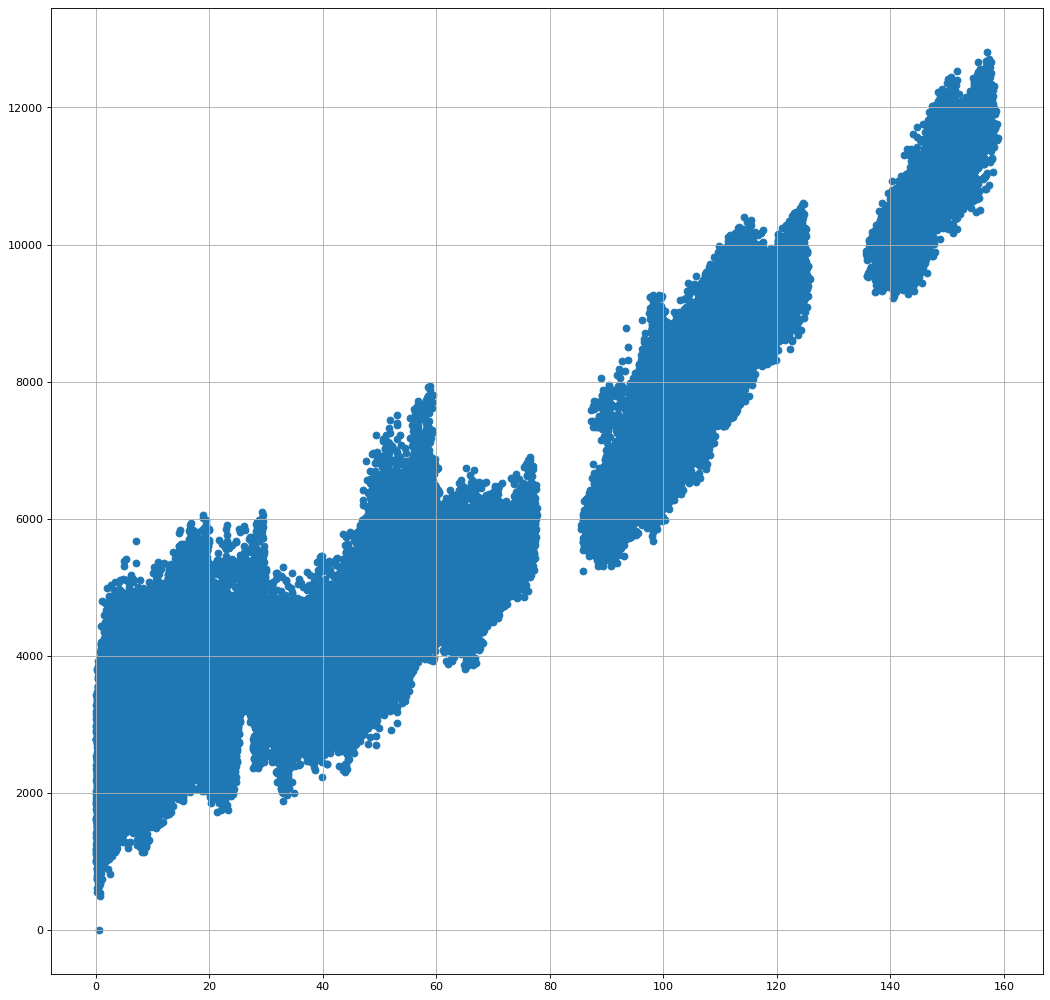

In [62]:
plot_shepard_diagram(dist_mx_trimap_tiny_tiny_eucl, dist_mx_X_tiny_tiny)

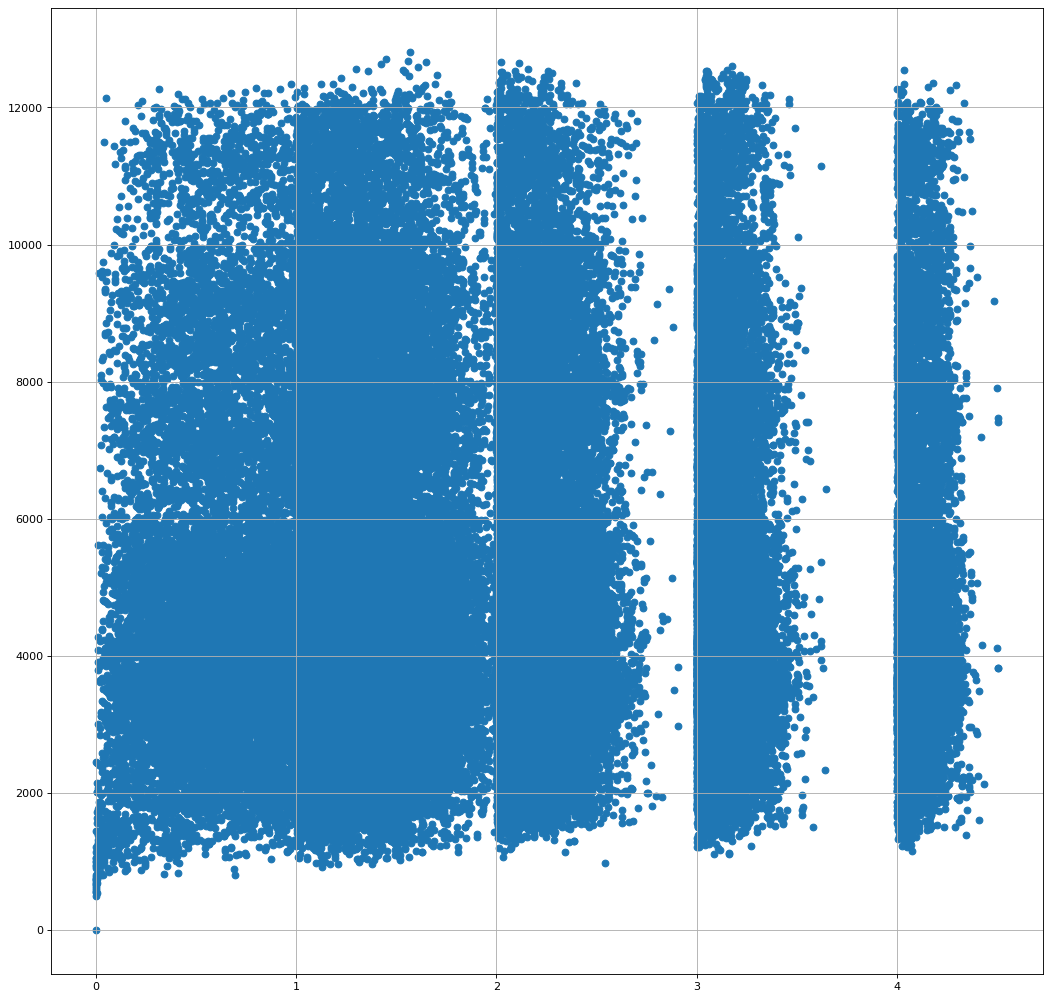

In [64]:
plot_shepard_diagram(dist_mx_ivhd_tiny_tiny, dist_mx_X_tiny_tiny)

## Generating plot for trustworthiness

In [7]:
trusts = pd.read_table('./smallnorb_metrics/smallnorb_trust_metric.txt')
trusts

Empty DataFrame
Columns: [{'umap': 0.9886729303442754, 'humap': None, 'trimap': 0.9847225040032026, 'pacmap': 0.9873609987990393, 'isomap': 0.8766733827061649, 'ivhd': 0.883405904723779}]
Index: []

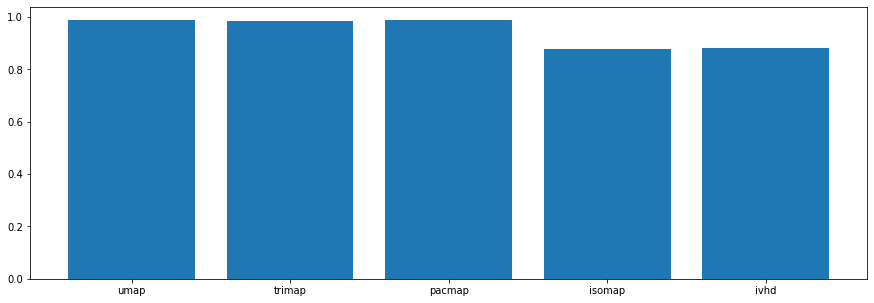

In [10]:
trusts = {'umap' : 0.989,
         'trimap' : 0.985,
          'pacmap' : 0.987,
          'isomap' : 0.877,
          'ivhd' : 0.883
         }

plt.figure(figsize=(15, 5))
plt.bar(range(len(trusts)), list(trusts.values()), align='center')
plt.xticks(range(len(trusts)), list(trusts.keys()))

plt.show() 

### Generating plot of time execution

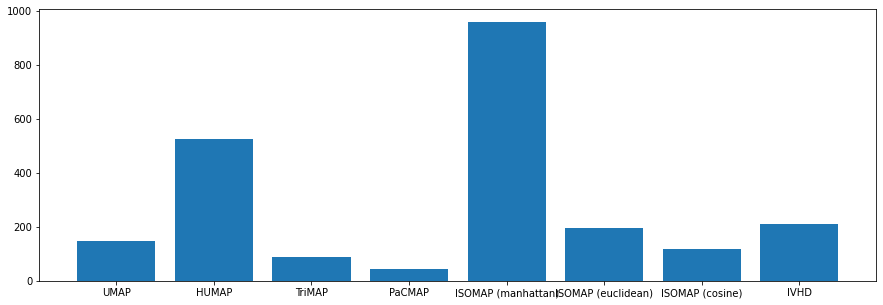

In [13]:
times = {
    'UMAP' : 145.98,
    'HUMAP' : 523.7,
    'TriMAP' : 88.36,
    'PaCMAP' : 42.12,
    'ISOMAP (manhattan)' : 958.35,
    'ISOMAP (euclidean)' : 194.22,
    'ISOMAP (cosine)' : 118.55,
    'IVHD' : 212
}

plt.figure(figsize=(15, 5))
plt.bar(range(len(times)), list(times.values()), align='center')
plt.xticks(range(len(times)), list(times.keys()))

plt.show() 